链接: https://pan.baidu.com/s/1QRLjEBmNAdGPCq9n1ec4Aw 提取码: smpm 

In [1]:
import pandas as pd

In [3]:
cd '/Users/datalab/Downloads/digg-votes/'

/Users/datalab/Downloads/digg-votes


In [4]:
ls

README.digg-votes  meta.digg-votes    out.digg-votes


In [19]:
df = pd.read_csv('out.digg-votes',sep = ' ', skiprows = 1, names = ['user', 'news', 'wt'])
df.head()

,user,news,wt
0,1,1,1\t1246573330
1,2,1,1\t1246603391
2,3,1,1\t1246573479
3,4,1,1\t1246599553
4,5,1,1\t1246568035


In [20]:
len(df)

3018197

In [30]:
wlist = []
tlist = []
for i in df['wt']:
    w, t = i.split('\t')
    wlist.append(int(w))
    tlist.append(int(t))

df['weight'] = wlist
df['time'] = tlist


In [31]:
df.head()

,user,news,wt,weight,time
0,1,1,1\t1246573330,1,1246573330
1,2,1,1\t1246603391,1,1246603391
2,3,1,1\t1246573479,1,1246573479
3,4,1,1\t1246599553,1,1246599553
4,5,1,1\t1246568035,1,1246568035


In [42]:
import datetime
# 2、将unix时间戳转换为python的datetime
u = 1243974627      #unix时间戳
u1 = 1246598688
t = datetime.datetime.fromtimestamp(u)
t1 = datetime.datetime.fromtimestamp(u1)
t, t1

(datetime.datetime(2009, 6, 3, 4, 30, 27),
 datetime.datetime(2009, 7, 3, 13, 24, 48))

In [52]:
users = df['user'].unique()
len(users)

139409

In [77]:
import sys
def flushPrint(d):
    sys.stdout.write('\r')
    sys.stdout.write(str(d))
    sys.stdout.flush()
    

from collections import defaultdict

edge_dict = defaultdict(int)
for k, i in enumerate(users):
    if k % 1000 ==0:
        flushPrint(k)
    dfi = df[df['user']==i]
    dfi = dfi.sort_values(by = ['time'])
    news_list = dfi['news']
    for m, n in zip(news_list, news_list[1:]):
        edge_dict[(m, n)] += 1

139000

In [78]:
import networkx as nx
G = nx.DiGraph()

for m, n in edge_dict:
    G.add_edge(m, n, weight = edge_dict[(m, n)])

nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 3553\nNumber of edges: 734604\nAverage in degree: 206.7560\nAverage out degree: 206.7560'

In [79]:
nx.write_weighted_edgelist(G, "digg_clickstream_weighted_edgelist.txt")

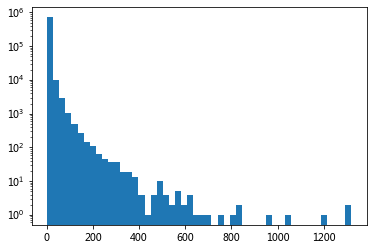

In [90]:
import pylab as plt

plt.hist(list(edge_dict.values()), bins = 50)
plt.yscale('log');

In [96]:
import networkx as nx
G1 = nx.DiGraph()

for m, n in edge_dict:
    w = edge_dict[(m, n)]
    if w > 50:
        G1.add_edge(m, n, weight = w)

nx.info(G1)

'Name: \nType: DiGraph\nNumber of nodes: 2283\nNumber of edges: 5754\nAverage in degree:   2.5204\nAverage out degree:   2.5204'

In [97]:
pos = nx.spring_layout(G1, k=0.1)


In [100]:
nx.write_weighted_edgelist?

In [101]:
nx.write_weighted_edgelist(G1, "digg_clickstream_weighted_edgelist50.csv", delimiter=',')

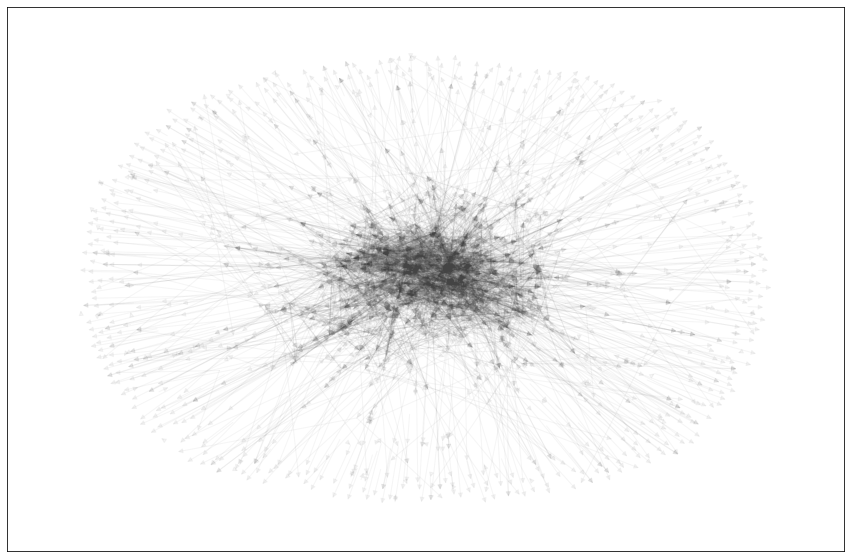

In [98]:
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx( G1, pos=pos, node_size=0, edge_color="#444444", alpha=0.05, with_labels=False)